# A/B Testing Assignment

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

### Import the [Absenteeism at Work data set](https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv). 

**Note:** The the delimiter of the file is a semi-colon (;), so you will need to set `sep=';'`.

In [4]:
url = 'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv'
df = pd.read_csv(url, sep=';')

In [3]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


## Confidence Intervals

Suppose this company is analyzing the health of its employees and is specifically interested in their Body Mass Index (BMI). Generate a 95% confidence interval of the mean for that field.

In [16]:
df.shape

(740, 21)

In [5]:
bmi_mean = df['Body mass index'].mean()
ci_low = np.percentile(df['Body mass index'], 2.5)
ci_high = np.percentile(df['Body mass index'], 97.5)
print(ci_low)
print(ci_high)

19.0
37.049999999999955


### Visualizing Confidence Intervals

Generate a sampling distribution of the mean for the Body Mass Index field. Create a histogram to visualize the sampling distribution and add an indicator showing the lower and upper bounds of the confidence interval.

In [19]:
#  Generate a sampling distribution of the mean for the Body Mass Index field
sample_means = []
for i in range(1000):
    bmi_sample = df['Body mass index'].sample(frac=1.0, replace=True)
    sample_means.append(bmi_sample.mean())

In [21]:
#  variables for confidence interval of sample means
ci_low = np.percentile(sample_means, 2.5)
ci_high = np.percentile(sample_means, 97.5)

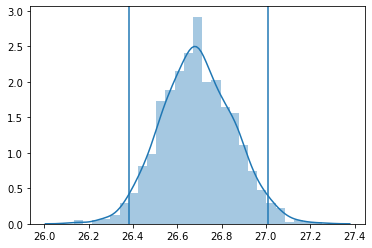

In [22]:
#  histogram to visualize sampling distribution
#  added indicator for lower and upper bounds of the confidence interval
sns.distplot(sample_means)
plt.axvline(ci_low)
plt.axvline(ci_high)
plt.show()

### Confidence Intervals by Group

Suppose we wanted to examine whether there was a difference in the BMIs of employees who drink socially and those that do not. Use the Social Drinker field to split the employees into groups, and then compute the confidence intervals for each group. What insights can you derive from the results?

In [30]:
#  split employees into groups for social drinkers and not
social_drinkers = df[df['Social drinker'] == 1]
not_social_drinkers = df[df['Social drinker'] == 0]
#  lo and hi intervals for social drinkers
sd_ci_lo = np.percentile(social_drinkers['Body mass index'], 2.5)
sd_ci_hi = np.percentile(social_drinkers['Body mass index'], 97.5)
#  intervals for non-social drinkers
nsd_ci_lo = np.percentile(not_social_drinkers['Body mass index'], 2.5)
nsd_ci_hi = np.percentile(not_social_drinkers['Body mass index'], 97.5)

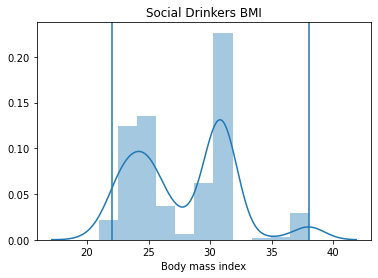

27.88809523809524
22.0, 38.0


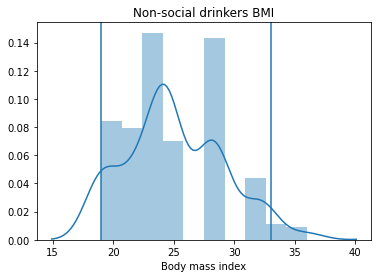

25.0875
19.0, 33.0


In [32]:
sns.distplot(social_drinkers['Body mass index'])
plt.axvline(sd_ci_hi)
plt.axvline(sd_ci_lo)
plt.title('Social Drinkers BMI')
plt.show()
print(str(social_drinkers['Body mass index'].mean()))
print(str(sd_ci_lo)+', '+ str(sd_ci_hi))
sns.distplot(not_social_drinkers['Body mass index'])
plt.axvline(nsd_ci_hi)
plt.axvline(nsd_ci_lo)
plt.title('Non-social drinkers BMI')
plt.show()
print(str(not_social_drinkers['Body mass index'].mean()))
print(str(nsd_ci_lo)+', '+ str(nsd_ci_hi))


### Sampling Distributions for Each Group

Next, let's generate a sampling distribution of the mean for each group and generate a plot containing both of their histograms to see if there is any overlap.

In [35]:
sd_means = []
nsd_means = []
for i in range(1000):
    sd_mean = social_drinkers['Body mass index'].sample(frac=1.0, replace=True).mean()
    sd_means.append(sd_mean)
    nsd_mean = not_social_drinkers['Body mass index'].sample(frac=1.0, replace=True).mean()
    nsd_means.append(nsd_mean)

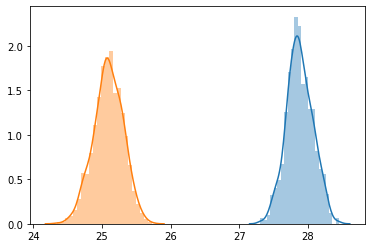

In [36]:
#  histogram plot of both sample mean distributions
sns.distplot(sd_means)
sns.distplot(nsd_means)
plt.show()

## A/B Testing

Based on our analysis so far, we would like to perform a t-test to determine whether there is a difference in BMI means between our two groups (social drinkers and non-social drinkers). Conduct an independent sample t-test and determine whether the differences between the groups is statistically significant. What is your conclusion?

In [38]:
t, p = stats.ttest_ind(sd_means, nsd_means)
print(t)
print(p)

306.0787299471239
0.0


## Confidence Intervals for Group Differences

Generate a 95% confidence interval for the mean difference in BMI between the two groups. Compute the interval using both the traditional method and bootstrapping and compare the results. What conclusions can you draw from the comparison? How would you present a summary of your results to stakeholders?

In [44]:
sd_means_ci_lo = np.percentile(sd_means, 2.5)
sd_means_ci_hi = np.percentile(sd_means, 97.5)
nsd_means_ci_lo = np.percentile(nsd_means, 2.5)
nsd_means_ci_hi = np.percentile(nsd_means, 97.5)

In [46]:
print(f"There is 95% probability of between a {sd_means_ci_hi - nsd_means_ci_hi} and {sd_means_ci_lo - nsd_means_ci_lo} difference in the BMI of social drinkers and non social drinkers")

There is 95% probability of between a 2.7595238095238095 and 2.8335714285714317 difference in the BMI of social drinkers and non social drinkers
